In [1]:
import dlsfunctions as dls
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
r = 2.2439608235145855e-09    # in meters
diameter = r * 2
mean = diameter - 3e-9
sigma = 2e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, mean, sigma, c)

In [3]:
m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [4]:
theta_input = np.append(f_1, beta)

In [5]:
simulated_data = dls.g2(theta_input, d, m, gamma, time_in)

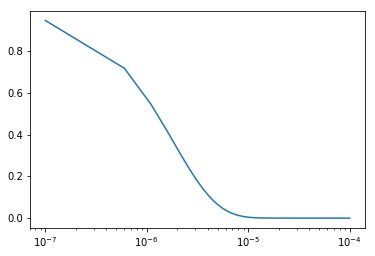

In [6]:
plt.semilogx(time_in, simulated_data)

In [7]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [8]:
start_pos = [theta_input + 1e-4*np.random.rand(ndim) for i in range(nwalkers)] 

In [9]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data, m, gamma, time_in))

In [10]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

array([0.35166667, 0.366     , 0.345     , 0.372     , 0.36566667,
       0.346     , 0.37033333, 0.35833333, 0.368     , 0.36766667,
       0.35466667, 0.36033333, 0.34966667, 0.376     , 0.37733333,
       0.36666667, 0.36266667, 0.36966667, 0.358     , 0.366     ,
       0.367     , 0.35966667, 0.37433333, 0.35466667, 0.364     ,
       0.365     , 0.348     , 0.36166667, 0.37166667, 0.36233333,
       0.367     , 0.388     , 0.37766667, 0.37066667, 0.36166667,
       0.35666667, 0.365     , 0.38033333, 0.36433333, 0.371     ,
       0.36833333, 0.37533333, 0.36033333, 0.35966667, 0.36433333,
       0.37166667, 0.36      , 0.36266667, 0.34633333, 0.352     ,
       0.361     , 0.37066667, 0.36166667, 0.37233333, 0.361     ,
       0.345     , 0.35333333, 0.361     , 0.36466667, 0.36066667,
       0.35266667, 0.37233333, 0.339     , 0.38533333, 0.367     ,
       0.382     , 0.34633333, 0.376     , 0.34533333, 0.35466667,
       0.338     , 0.371     , 0.34666667, 0.37066667, 0.355  

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

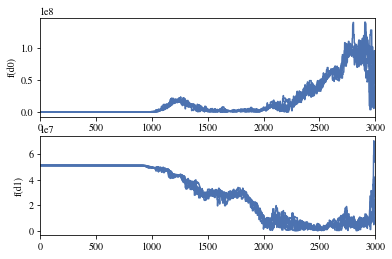

In [11]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

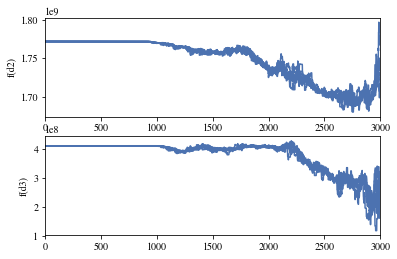

In [12]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

In [13]:
samples = sampler.chain[:,2800:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [14]:
q

,f(d0),f(d1),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19)
0.16,7.147631e+07,3.568661e+06,1.696225e+09,2.081374e+08,1.896541e+08,4.849554e+07,1.237925e+08,5.747532e+07,3.389588e+07,1.037791e+08,2.482070e+08,2.730122e+08,3.720715e+08,5.618088e+07,1.722980e+08,2.113599e+08,1.045981e+07,1.810976e+07,3.917573e+07,1.389304e+08
0.50,8.923496e+07,7.328647e+06,1.705663e+09,2.566141e+08,2.508296e+08,6.570813e+07,1.418684e+08,1.576704e+08,1.165486e+08,1.808643e+08,3.841142e+08,3.198152e+08,4.304220e+08,8.908032e+07,1.942979e+08,2.390734e+08,1.743850e+07,2.690869e+07,6.690315e+07,1.867819e+08
0.84,1.011558e+08,1.536715e+07,1.725422e+09,2.922510e+08,4.404251e+08,8.988891e+07,1.665955e+08,2.500844e+08,2.258875e+08,2.574332e+08,5.137458e+08,4.095011e+08,5.289619e+08,2.688778e+08,2.254919e+08,3.097626e+08,5.242948e+07,3.698978e+07,8.254239e+07,2.403418e+08


In [16]:
infer_d = np.zeros(20)
infer_d[0] = 8.9234e7
infer_d[1] = 7.328e6
infer_d[2] = 1.706e9
infer_d[3] = 2.566e8
infer_d[4] = 2.508e8
infer_d[5] = 6.57e7
infer_d[6] = 1.4188e8
infer_d[7] = 1.5767e8
infer_d[8] = 1.165e8
infer_d[9] = 1.809e8
infer_d[10] = 3.841e8
infer_d[11] = 3.198e8
infer_d[12] = 4.304e8
infer_d[13] = 8.908e7
infer_d[14] = 1.943e8
infer_d[15] = 2.3907e8
infer_d[16] = 1.744e7
infer_d[17] = 2.69e7
infer_d[18] = 6.69e7
infer_d[19] = 1.86e8

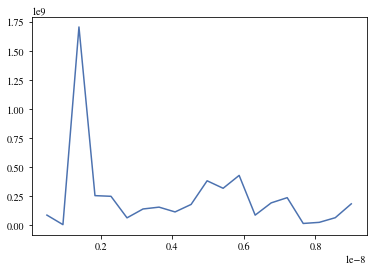

In [17]:
plt.plot(d, infer_d)